In [67]:
file_path_house = 'full_simplified/full_simplified_house.ndjson'
file_path_nail = "full_simplified_nail.ndjson"
file_path_fan = 'full_simplified_fan.ndjson'
file_path_dishwasher = 'full_simplified_dishwasher.ndjson'
file_path_blackberry = 'full_simplified_blackberry.ndjson'
file_path_leaf = 'full_simplified_leaf.ndjson'

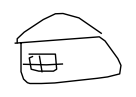

In [73]:
import json
import matplotlib
import matplotlib.pyplot as plt

def draw_from_ndjson(file_path, target_key_id, save_path):
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            if data['key_id'] == str(target_key_id):
                draw_house(data['drawing'])
                break

def draw_house(drawing_data):
    plt.figure(figsize=(1.5, 1))
    for stroke in drawing_data:
        plt.plot(stroke[0], [y for y in stroke[1]], color='black', linewidth=1)  
    plt.axis('off')
    plt.gca().invert_yaxis() 
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

file_path = file_path_house
target_key_id = 5054419760578560
save_path = 'tooltip_images/tooltip-leaf.png'
draw_from_ndjson(file_path, target_key_id, save_path)


In [32]:
# Notes : nail tooltip keyid = 5630185493757952
#     house tooltip key id = 5089582271954944 
# fan key id = 5118763739381760
# dishwasher key id = 5915257874677760 and 6673181093920768
# blackberry = 5098333183934464 and 6424154557382656
# canadaleaf = 6216938227236864 
#normalleaf = 6649062268862464

In [72]:
# import json
# import matplotlib.pyplot as plt

# file_path = file_path_dishwasher

# selected_drawings = []
# with open(file_path, 'r') as file:
#     for line in file:
#         drawing = json.loads(line)
#         selected_drawings.append(drawing)
#         if len(selected_drawings) == 5625:
#             break

# # Plot the drawings in a grid
# fig, axes = plt.subplots(75, 75, figsize=(100, 100)) 
# axes = axes.flatten()

# for i, drawing_data in enumerate(selected_drawings):
#     for stroke in drawing_data['drawing']:
#         inverted_y = [255 - y for y in stroke[1]]
#         axes[i].plot(stroke[0], inverted_y, color="black")
#         axes[i].set_xlim(0, 255)
#         axes[i].set_ylim(0, 255)
#     axes[i].set_title(f"ID: {drawing_data['key_id']}", fontsize=6)
#     axes[i].axis('off')

# plt.tight_layout()

# # Save the plot as an image
# output_file = 'dishwasher_drawings.png'
# plt.savefig(output_file, bbox_inches='tight')
# plt.close()

# print(f"Saved the drawings to {output_file}")

import json
import matplotlib.pyplot as plt
import numpy as np

file_path = file_path_dishwasher 

selected_drawings = []
skip_drawings = 5625  # Number of drawings to skip
target_drawings = 5625  # Number of drawings to process after skipping
total_drawings = skip_drawings + target_drawings
current_count = 0

with open(file_path, 'r') as file:
    for line in file:
        if current_count >= skip_drawings:
            drawing = json.loads(line)
            selected_drawings.append(drawing)
            if len(selected_drawings) == target_drawings:
                break
        current_count += 1

# Create a subplot grid for 5625 drawings
grid_size = int(np.ceil(np.sqrt(target_drawings)))  
fig, axes = plt.subplots(grid_size, grid_size, figsize=(100, 100))
axes = axes.flatten()

for i, drawing_data in enumerate(selected_drawings):
    for stroke in drawing_data['drawing']:
        axes[i].plot(stroke[0], [-y for y in stroke[1]], color="black")  # Invert y-axis
        axes[i].set_xlim(0, 255)
        axes[i].set_ylim(-255, 0)  # Adjust for inverted y-axis
    axes[i].set_title(f"ID: {drawing_data['key_id']}", fontsize=6)
    axes[i].axis('off')

plt.tight_layout()

# Save the plot as an image
output_file = 'next_dishwasher_drawings.png'
plt.savefig(output_file, bbox_inches='tight')
plt.close()

print(f"Saved the drawings to {output_file}")


Saved the drawings to next_dishwasher_drawings.png


In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

file_path = file_path_dishwasher  # Make sure this is the correct path to your file
start_index = 0  # Update this to the starting index of the drawings you want to plot
drawing_count = 5625  # Number of drawings to plot

selected_drawings = []
with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        if i < start_index:
            continue
        if i >= start_index + drawing_count:
            break
        drawing = json.loads(line)
        selected_drawings.append(drawing)

# Create a subplot grid large enough for 5625 drawings
grid_size = int(np.ceil(np.sqrt(drawing_count)))  # Calculate the grid size
fig, axes = plt.subplots(grid_size, grid_size, figsize=(100, 100))
axes = axes.flatten()

for i, drawing_data in enumerate(selected_drawings):
    for stroke in drawing_data['drawing']:
        axes[i].plot(stroke[0], [255 - y for y in stroke[1]], color="black") 
        axes[i].set_xlim(0, 255)
        axes[i].set_ylim(0, 255)
    axes[i].set_title(f"ID: {drawing_data['key_id']}", fontsize=6)
    axes[i].axis('off')

plt.tight_layout()

# Save the plot as an image
output_file = f'dishwasher_{start_index}_{start_index + drawing_count}.png'
plt.savefig(output_file, bbox_inches='tight')
plt.close()

print(f"Saved the drawings to {output_file}")
